In [1]:
import scimap as sm
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Running SCIMAP  2.3.5


/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/mpl_scatter_density/__init__.py:4: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# generate anndata object
df = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan_quantification.csv')
df

,MPO,HistoneH3,SMA,CD16,CD38,HLADR,CD27,CD15,CD45RA,CD163,...,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type
0,0.000000,1.819988,0.502650,1.265410,0.515007,3.331261,0.403800,0.455421,0.528734,2.948392,...,13,6.094800,2.780135,0.889904,600,600,M2_Macrophage,Immune,Myeloid_immune,M2_Macrophage
1,0.196983,2.541684,1.247892,0.161012,1.071582,0.414533,0.735485,0.080994,0.859621,0.289262,...,10,5.656854,2.000000,0.935414,600,600,unlabelled,Immune,Lymphoid_immune,Plasma_cell
2,0.135920,2.393087,1.136961,0.505529,0.605836,0.710857,0.419814,0.100110,0.743002,0.329851,...,56,21.520654,3.368407,0.987675,600,600,Stroma,Stromal,Stroma,Stroma
3,0.210604,2.301097,0.858570,0.422594,0.731755,1.433206,0.373062,0.086509,0.804451,0.340700,...,25,9.732420,3.183960,0.944972,600,600,unlabelled,Cancer,Cancer,Cancer
4,0.165905,2.244917,1.396334,1.744382,0.458541,4.006500,0.003607,0.562882,1.236516,1.747839,...,12,5.294329,2.862220,0.841267,600,600,Dendritic_cell,Immune,Myeloid_immune,Dendritic_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457112,0.342312,5.248389,3.919117,2.144037,1.008428,1.917531,1.592820,0.868188,1.364461,0.494844,...,42,9.797365,5.435488,0.831990,600,600,unlabelled,Cancer,Cancer,Cancer
457113,0.110884,3.520289,0.310834,2.590231,2.336469,3.652604,1.443007,0.248852,0.455855,1.025672,...,27,10.732613,3.134663,0.956397,600,600,CD8+_T_cell,Immune,Lymphoid_immune,CD8+_T_cell
457114,0.150941,4.214958,2.651646,0.807826,0.403674,1.226701,0.400776,0.265660,0.513530,0.168271,...,33,12.864691,3.228974,0.967988,600,600,Stroma,Stromal,Stroma,Stroma
457115,0.203716,6.014126,2.757555,2.679402,1.482629,2.401113,1.907091,1.873059,1.597177,0.806173,...,39,11.440093,4.323082,0.925851,600,600,unlabelled,Cancer,Cancer,Cancer


In [3]:
df.columns

Index(['MPO', 'HistoneH3', 'SMA', 'CD16', 'CD38', 'HLADR', 'CD27', 'CD15',
       'CD45RA', 'CD163', 'B2M', 'CD20', 'CD68', 'Ido1', 'CD3', 'LAG3',
       'CD11c', 'PD1', 'PDGFRb', 'CD7', 'GrzB', 'PDL1', 'TCF7', 'CD45RO',
       'FOXP3', 'ICOS', 'CD8a', 'CarbonicAnhydrase', 'CD33', 'Ki67', 'VISTA',
       'CD40', 'CD4', 'CD14', 'Ecad', 'CD303', 'CD206', 'cleavedPARP', 'DNA1',
       'DNA2', 'image', 'sample_id', 'cell_id', 'x', 'y', 'area',
       'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px',
       'height_px', 'cell_labels', 'level_1_cell_type', 'level_2_cell_type',
       'cell_type'],
      dtype='object')

In [55]:
X = df.loc[:, : 'DNA2']
obs = df.loc[:, 'DNA2':]
adata = ad.AnnData(
    X=X,
    obs=obs,
    var=pd.DataFrame(index=X.columns)
)
adata.raw = adata.copy()

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning:

Transforming to str index.



In [56]:
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan/markers.txt') as f:
    markers = f.read().splitlines()
markers

['MPO',
 'HistoneH3',
 'SMA',
 'CD16',
 'CD38',
 'HLADR',
 'CD27',
 'CD15',
 'CD45RA',
 'CD163',
 'B2M',
 'CD20',
 'CD68',
 'Ido1',
 'CD3',
 'LAG3',
 'CD11c',
 'PD1',
 'PDGFRb',
 'CD7',
 'GrzB',
 'PDL1',
 'TCF7',
 'CD45RO',
 'FOXP3',
 'ICOS',
 'CD8a',
 'CarbonicAnhydrase',
 'CD33',
 'Ki67',
 'VISTA',
 'CD40',
 'CD4',
 'CD14',
 'Ecad',
 'CD303',
 'CD206',
 'cleavedPARP',
 'DNA1',
 'DNA2']

In [57]:
adata.uns['all_markers'] = markers

In [9]:
%gui qt

In [58]:
img_path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan/images/IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff'
seg_path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/datasets/IMMUcan/masks/IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff'

In [59]:
sample = 'IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff'

In [60]:
adata = adata[adata.obs['image'] == sample]

In [53]:
adata

View of AnnData object with n_obs × n_vars = 4061 × 40
    obs: 'DNA2', 'image', 'sample_id', 'cell_id', 'x', 'y', 'area', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'width_px', 'height_px', 'cell_labels', 'level_1_cell_type', 'level_2_cell_type', 'cell_type', 'predicted_phenotype'
    uns: 'gates', 'napariGaterProvenance', 'all_markers', 'image_contrast_settings'

In [377]:
sm.pl.napariGater(img_path, adata, imageid='image',subset=sample, x_coordinate='x', y_coordinate='y', log=False, point_size=4)

/var/folders/ry/jl4ll0zx1l709rh4r7_0cq6r0000gn/T/ipykernel_2869/3989160583.py:1: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Initializing...
Loading image data...
Calculating contrast settings...
Initialization completed in 0.01 seconds
Opening napari viewer...
Napari viewer initialized in 15.06 seconds


Gate confirmed for CD163 at 1.40


In [116]:
adata.uns['gates']

imageid,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff
markers,
B2M,2.868700
CD11c,3.300000
CD14,3.440154
CD15,2.300000
CD16,2.102442
CD163,0.900000
CD20,1.900000
CD206,2.000000
CD27,2.271503


In [378]:
phenotype = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/phenotype_benchmark/github/pheno_benchmark_small/src/scimap_manual_annotation/cHL_2_MIBI/decision_matrix_IMMUcan.csv')
phenotype.style.format(na_rep='')

,Unnamed: 0,Unnamed: 1,Ecad,SMA,PDGFRb,CD3,CD4,CD8a,FOXP3,CD7,CD38,CD20,CD15,MPO,CD163,CD68,CD206,CD11c,HLADR,CD303
0,all,Cancer,pos,,,,,,,,,,,,,,,,,
1,all,Stroma,,pos,,,,,,,,,,,,,,,,
2,all,T_cells,,,,pos,,,,,,,,,,,,,,
3,T_cells,CD4+_T_cell,,,,,pos,neg,,,,,,,,,,,,
4,T_cells,CD8+_T_cell,,,,,neg,pos,,,,,,,,,,,,
5,CD4+_T_cell,Treg,,,,,,,pos,,,,,,,,,,,
6,all,NK_cell,,,,,,,,pos,,,,,,,,,,
7,all,Plasma_cell,,,,,,,,,pos,,,,neg,,,,,neg
8,all,B_cell,,,,,,,,,,pos,,,,,,,,
9,all,Neutrophil,,,,,,,,,,,allpos,allpos,,,,,,


In [379]:
adata = sm.pp.rescale (adata, gate=adata.uns['gates'], imageid='image', log=False)


Scaling Image: IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff
Scaling MPO (gate: 0.500)
Scaling HistoneH3 (gate: 2.318)
Scaling SMA (gate: 1.300)
Scaling CD16 (gate: 2.102)
Scaling CD38 (gate: 2.150)
Scaling HLADR (gate: 4.000)
Scaling CD27 (gate: 2.272)
Scaling CD15 (gate: 2.300)
Scaling CD45RA (gate: 1.681)
Scaling CD163 (gate: 1.400)
Scaling B2M (gate: 2.869)
Scaling CD20 (gate: 1.900)
Scaling CD68 (gate: 2.800)
Scaling Ido1 (gate: 2.299)
Scaling CD3 (gate: 1.500)
Scaling LAG3 (gate: 1.112)
Scaling CD11c (gate: 2.700)
Scaling PD1 (gate: 1.009)
Scaling PDGFRb (gate: 2.200)
Scaling CD7 (gate: 2.500)
Scaling GrzB (gate: 2.176)
Scaling PDL1 (gate: 1.782)
Scaling TCF7 (gate: 2.285)
Scaling CD45RO (gate: 3.196)
Scaling FOXP3 (gate: 1.700)
Scaling ICOS (gate: 1.835)
Scaling CD8a (gate: 2.500)
Scaling CarbonicAnhydrase (gate: 1.705)
Scaling CD33 (gate: 3.302)
Scaling Ki67 (gate: 2.719)
Scaling VISTA (gate: 2.441)
Scaling CD40 (gate: 2.365)
Scaling CD4 (gate: 2.160)
Sca

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:145: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [380]:
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, imageid='image', label="predicted_phenotype") 

Phenotyping Cancer
Phenotyping Stroma
Phenotyping T_cells
Phenotyping NK_cell
Phenotyping Plasma_cell
Phenotyping B_cell
Phenotyping Neutrophil
Phenotyping M2_Macrophage
Phenotyping Dendritic_cell
Phenotyping Plasmacytoid_dendritic_cell
Phenotyping BnT
-- Subsetting T_cells
Phenotyping CD4+_T_cell
Phenotyping CD8+_T_cell
-- Subsetting CD4+_T_cell
Phenotyping Treg
Consolidating the phenotypes across all groups


/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukashat/miniforge3/envs/scimap_benchmark/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice 

In [381]:
adata.obs['predicted_phenotype'].value_counts()

predicted_phenotype
Plasma_cell                    1569
Cancer                          531
CD4+_T_cell                     394
Dendritic_cell                  293
CD8+_T_cell                     263
M2_Macrophage                   210
Unknown                         201
Stroma                          161
Treg                            145
likely-Plasma_cell               99
NK_cell                          89
BnT                              78
B_cell                           14
Plasmacytoid_dendritic_cell       8
Neutrophil                        6
Name: count, dtype: int64

In [382]:
adata[adata.obs['image'] == sample].obs['cell_type'].value_counts()

cell_type
Plasma_cell                    1519
Cancer                          561
CD4+_T_cell                     508
CD8+_T_cell                     484
undefined                       337
Treg                            243
Stroma                          102
Dendritic_cell                  101
M2_Macrophage                    71
BnT                              46
NK_cell                          40
Plasmacytoid_dendritic_cell      38
B_cell                            8
Neutrophil                        3
Name: count, dtype: int64

In [207]:
adata.obs

,DNA2,image,sample_id,cell_id,x,y,area,major_axis_length,minor_axis_length,eccentricity,width_px,height_px,cell_labels,level_1_cell_type,level_2_cell_type,cell_type,predicted_phenotype
215787,5.556034,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,1,238.000000,0.538462,13,6.838803,2.537296,0.928627,600,600,unlabelled,Immune,Lymphoid_immune,Plasma_cell,Plasma_cell
215788,5.392122,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,2,42.769231,0.461538,13,7.554372,1.975318,0.965209,600,600,unlabelled,undefined,undefined,undefined,Stroma
215789,5.457823,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,3,299.090909,0.772727,22,9.567788,2.930813,0.951928,600,600,unlabelled,undefined,undefined,undefined,Plasma_cell
215790,5.370931,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,4,311.027027,1.162162,37,12.812420,3.966584,0.950870,600,600,unlabelled,undefined,undefined,undefined,Plasma_cell
215791,5.519733,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,5,498.294118,0.823529,17,6.977663,3.108884,0.895258,600,600,unlabelled,undefined,undefined,undefined,Plasma_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219843,4.529100,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,4071,440.363636,597.454545,33,9.484437,4.527996,0.878679,600,600,Cancer,Cancer,Cancer,Cancer,Cancer
219844,4.784709,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,4072,521.936170,597.829787,47,15.692468,3.960529,0.967627,600,600,Cancer,Cancer,Cancer,Cancer,Cancer
219845,4.830485,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,4073,30.500000,598.000000,18,6.831301,3.265986,0.878310,600,600,CD8+_T_cell,Immune,Lymphoid_immune,CD8+_T_cell,CD4+_T_cell
219846,4.757105,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-T...,4074,92.777778,598.555556,9,5.274258,1.946056,0.929440,600,600,unlabelled,undefined,undefined,undefined,Stroma


In [383]:
adata.obs['predicted_phenotype'] = adata.obs['predicted_phenotype'].replace({'Unknown': 'undefined', 'likely-Cancer': 'Cancer', 'likely-Stroma': 'Stroma', 'likely-M2_Macrophage': 'M2_Macrophage', 'likely-Plasma_cell': 'Plasma_cell', 'likely-B_cell': 'B_cell', 'likely-CD4+_T_cell': 'CD4+_T_cell', 'likely-CD8+_T_cell': 'CD8+_T_cell', 'likely-NK_cell': 'NK_cell', 'likely-Treg': 'Treg', 'likely-Dendritic_cell': 'Dendritic_cell', 'likely-Plasmacytoid_dendritic_cell': 'Plasmacytoid_dendritic_cell'})

In [384]:
print(classification_report(adata[adata.obs['image'] == sample].obs['predicted_phenotype'], adata[adata.obs['image'] == sample].obs['cell_type'], zero_division=0))

                             precision    recall  f1-score   support

                     B_cell       0.88      0.50      0.64        14
                        BnT       0.89      0.53      0.66        78
                CD4+_T_cell       0.58      0.75      0.65       394
                CD8+_T_cell       0.50      0.92      0.65       263
                     Cancer       0.79      0.84      0.82       531
             Dendritic_cell       0.31      0.11      0.16       293
              M2_Macrophage       0.58      0.20      0.29       210
                    NK_cell       0.65      0.29      0.40        89
                 Neutrophil       1.00      0.50      0.67         6
                Plasma_cell       0.86      0.78      0.82      1668
Plasmacytoid_dendritic_cell       0.13      0.62      0.22         8
                     Stroma       0.68      0.43      0.52       161
                       Treg       0.59      0.99      0.74       145
                  undefined      

In [385]:
cm = confusion_matrix(
	adata[adata.obs['image'] == sample].obs['cell_type'],
	adata[adata.obs['image'] == sample].obs['predicted_phenotype'],
	labels=adata.obs['cell_type'].unique(),
    normalize='true'
)

<Figure size 1500x1500 with 0 Axes>

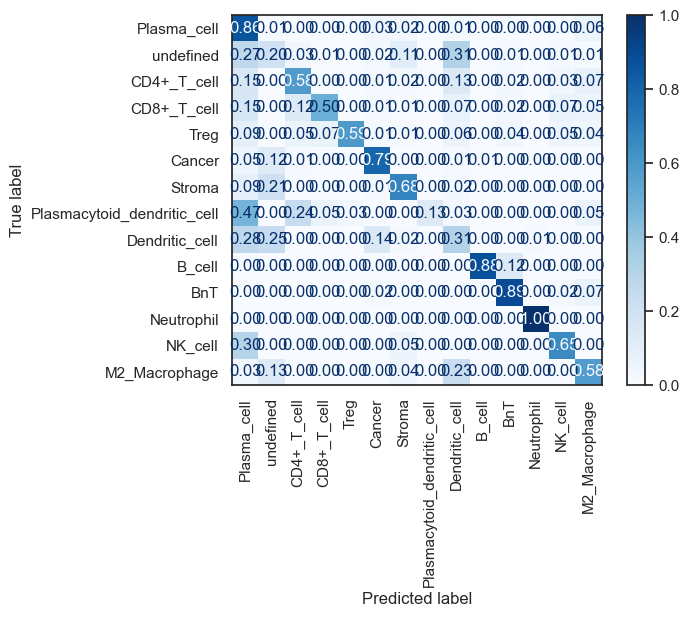

In [386]:
plt.figure(figsize=(15, 15))
cmd = ConfusionMatrixDisplay(cm, display_labels=adata.obs['cell_type'].unique())
cmd.plot(cmap='Blues', values_format='.2f', xticks_rotation=90)
plt.show()

In [349]:
sm.pl.image_viewer(image_path=img_path, 
                   adata=adata, 
                   overlay='cell_type', 
                   point_size=5,
                   y_coordinate='y',
                   x_coordinate='x',
                   subset='IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff',
                   imageid='image',
                   point_color='white')

In [350]:
sm.pl.image_viewer(image_path=img_path, 
                   adata=adata, 
                   overlay='predicted_phenotype', 
                   point_size=5,
                   y_coordinate='y',
                   x_coordinate='x',
                   subset='IMMUcan_Batch20210701_LUNG_10022144-LUNG-VAR-TIS-01-IMC-01_003.tiff',
                   imageid='image',
                   point_color='white')